In [5]:
import numpy as np
import pandas as pd
import nibabel as nib
import random
import sys
import os
import scipy
import os.path as osp
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib

sys.path.append('..')

from functions.visualization import retinotopic_map_plot
from ipywidgets import interact, Dropdown
from functions.evaluation import predicted_vs_empirical, return_list_of_subs, transform_polarangle
from deepRetinotopy_TheToolbox.utils.rois import ROI_WangParcelsPlusFovea as roi
from nilearn import plotting

# Figure 1 - subplots from panel b

In [6]:
if os.path.isdir('../output/figures/figure1/') == False:
    os.makedirs('../output/figures/figure1/')

In [7]:
# Curvature plot
def figure1_panelb(surface = 'native'):
    if surface == 'native':
        surface_file = '/BULK/LABDATA/openneuro/ds003787/derivatives/freesurfer/sub-wlsubj001/surf/lh.graymid.gii'
        curvature = nib.load('/BULK/LABDATA/openneuro/ds003787/derivatives/freesurfer/sub-wlsubj001/surf/lh.graymid.H.gii').agg_data()
        polar_angle = nib.load('/BULK/LABDATA/openneuro/ds003787/derivatives/freesurfer/sub-wlsubj001/deepRetinotopy/sub-wlsubj001.predicted_polarAngle_model.lh.native.func.gii').agg_data()
            
        mask = polar_angle == 179
        polar_angle[mask] = -1
        threshold = 1
        polar_angle = polar_angle + threshold

    elif surface == '32k_fs_LR':
        surface_file = '/BULK/LABDATA/openneuro/ds003787/derivatives/freesurfer/sub-wlsubj001/surf/sub-wlsubj001.lh.midthickness.32k_fs_LR.surf.gii'
        curvature = nib.load('/BULK/LABDATA/openneuro/ds003787/derivatives/freesurfer/sub-wlsubj001/surf/sub-wlsubj001.curvature-midthickness.lh.32k_fs_LR.func.gii').agg_data()
        polar_angle = nib.load('/BULK/LABDATA/openneuro/ds003787/derivatives/freesurfer/sub-wlsubj001/deepRetinotopy/sub-wlsubj001.fs_predicted_polarAngle_lh_curvatureFeat_model.func.gii').agg_data()

        mask = polar_angle == -1
        subtract = polar_angle >= 180
        add = polar_angle < 180
        polar_angle[subtract] = polar_angle[subtract] - 180
        polar_angle[add] = polar_angle[add] + 180
        polar_angle[mask] = -1

        threshold = 1
        polar_angle = polar_angle + threshold

    # Polar angle plot
    ## binary curvature
    curvature[curvature > 1] = 1
    curvature[curvature < -1] = -1
    
    view = plotting.plot_surf(
        surf_mesh=surface_file,
        surf_map=np.reshape(curvature, (-1)), 
        cmap='coolwarm', black_bg=False, symmetric_cmap=False, vmax=.5, vmin=-.5, view='medial', colorbar=True)
    view.savefig('../output/figures/figure1/' + surface + '_surf.png', dpi=300)

    view = plotting.plot_surf(
        surf_mesh=surface_file,
        surf_map=np.reshape(polar_angle, (-1)), 
        bg_map=np.reshape(curvature, (-1)), cmap='gist_rainbow_r', black_bg=False, symmetric_cmap=False, view='medial', colorbar=True, threshold=threshold)
    view.savefig('../output/figures/figure1/' + surface + '_surf_PA.png', dpi=300)
    return 'Images saved to ../output/figures/figure1/' + surface + '_surf.png and ' + surface + '_surf_PA.png'

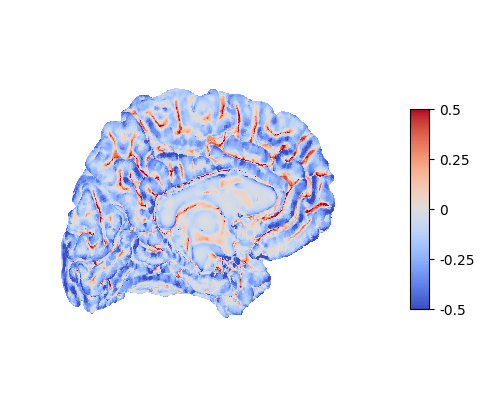

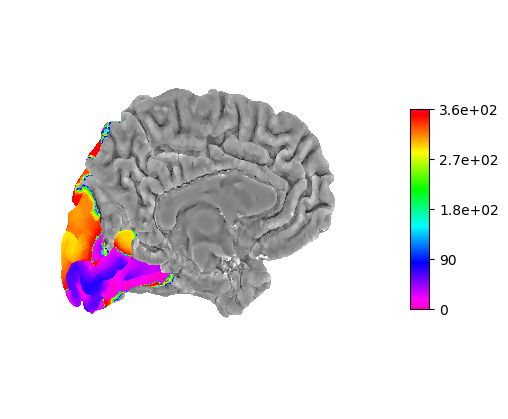

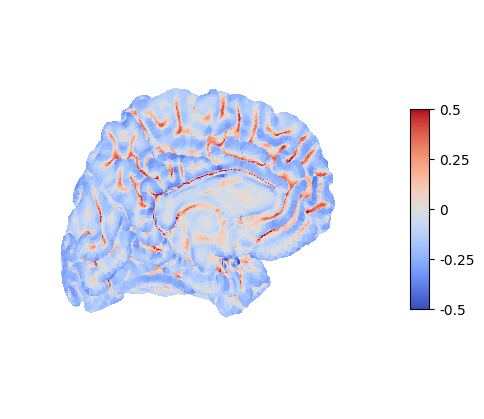

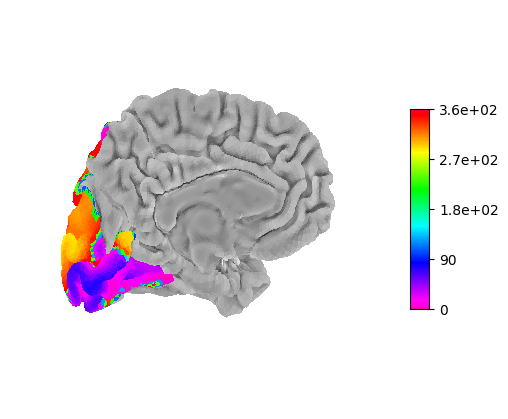

In [8]:
for surface in ['native', '32k_fs_LR']:
    figure1_panelb(surface = surface)